In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Load the advertising dataset
data_path = 'advertising.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.shape
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.duplicated().sum()

0

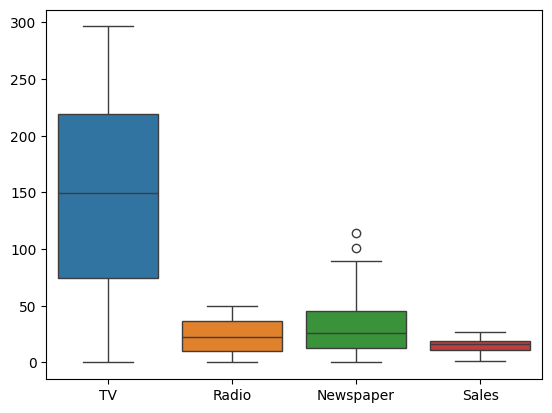

In [23]:
sns.boxplot(data)
plt.show()

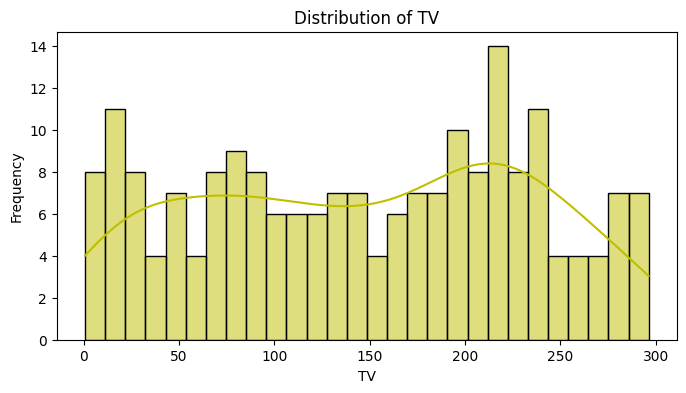

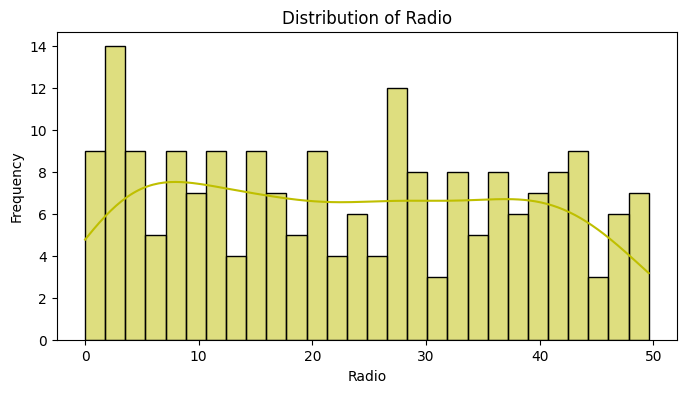

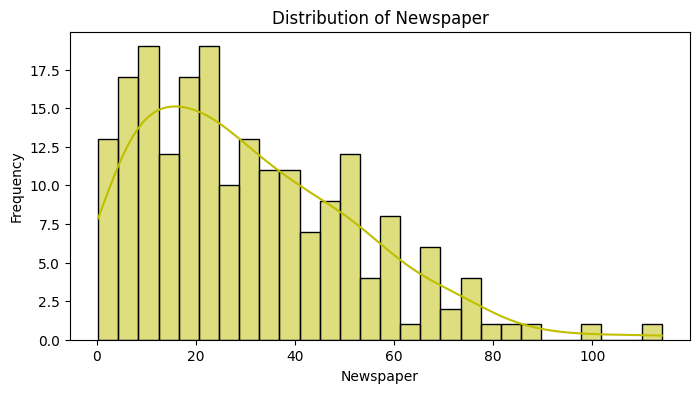

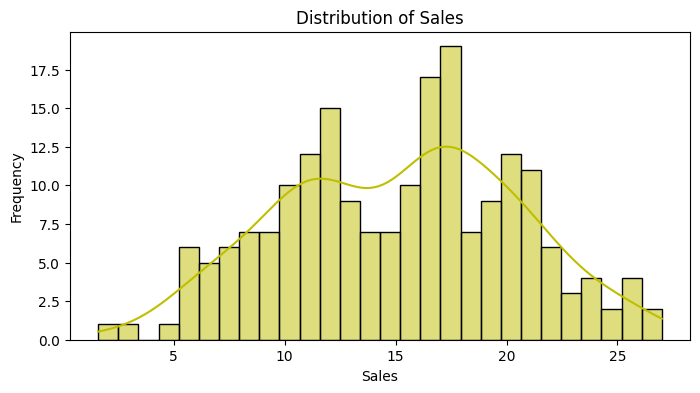

In [12]:
for feature in data.columns:
    plt.figure(figsize=(8, 4))
    plt.title(f'Distribution of {feature}')

    sns.histplot(data[feature], kde=True, bins=28, color='y')

    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [13]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


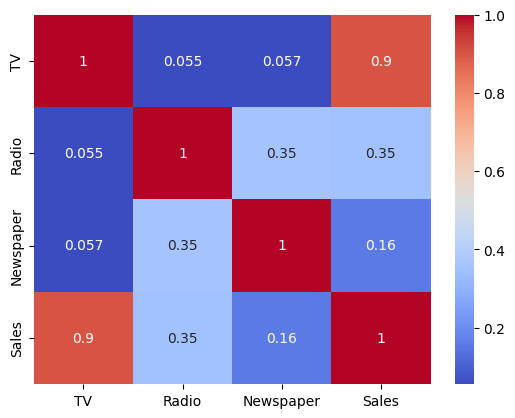

In [14]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [18]:
total_tv_spend = data['TV'].sum()
total_newspaper_spend = data['Newspaper'].sum()
total_radio_spend = data['Radio'].sum()

categories = ['TV', 'Newspaper', 'Radio']
totals = [total_tv_spend, total_newspaper_spend, total_radio_spend]

<ipython-input-20-25d0f3bc7370>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=totals,palette='terrain_r')


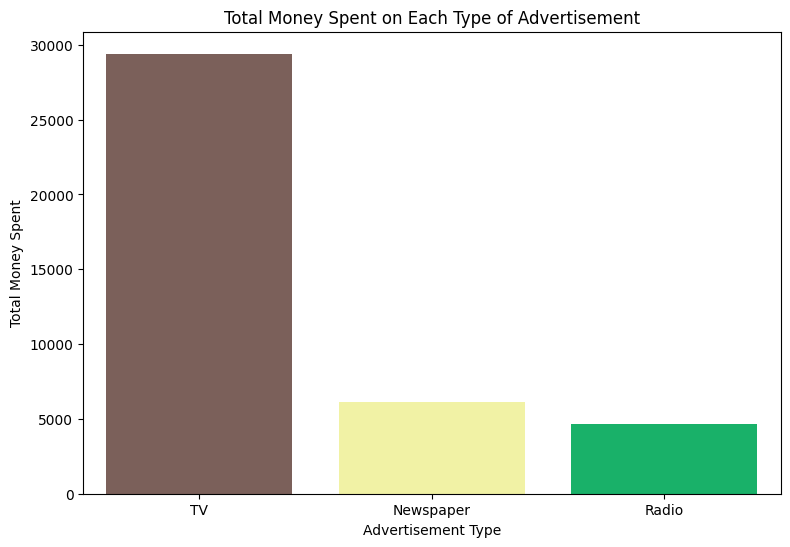

In [20]:
plt.figure(figsize=(9, 6))
sns.barplot(x=categories, y=totals,palette='terrain_r')
plt.xlabel('Advertisement Type')
plt.ylabel('Total Money Spent')
plt.title('Total Money Spent on Each Type of Advertisement')
plt.show()

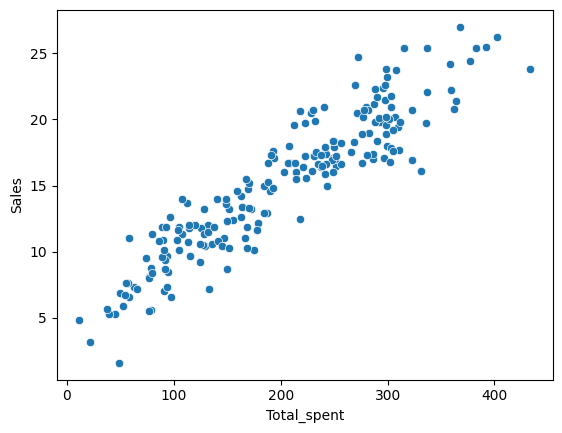

In [24]:
data['Total_spent'] = data['TV']+data['Radio']+data['Newspaper']
sns.scatterplot(x=data['Total_spent'],y=data['Sales'])
plt.show()

In [28]:
x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=12)

In [30]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [32]:
y_train_pred = rg.predict(x_train)
y_test_pred = rg.predict(x_test)

In [34]:
print("\nr2 score(Train data):",r2_score(y_train,y_train_pred))
print("\nr2 score(Test data):",r2_score(y_test,y_test_pred))


r2 score(Train data): 0.8891698240674195

r2 score(Test data): 0.9270583800214306
